In [162]:
import array
import os
import numpy as np
import random
from PIL import Image

class PPM2grey:
    def __init__(self):
        #self.real_image=None
        self.width=None
        self.height=None
        self.real_arr=None
        
        self.pgm_buff=None
        self.ppm_buff=None
        
        
        self.ppm_ready=True
        self.pgm_ready=True        
        
        
    def ppm_read(self,file):
            #Importing ppm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 3-D array using numpy module
            real_image_arr=np.asarray(real_image)
            self.real_arr=real_image_arr.copy()
            
            #getting the height and width of the ppm image
            shape = real_image_arr.shape
            
            self.height = shape[0]
            self.width =  shape[1]

        
    def ppm_togrey(self):

        if self.width and self.height:
            
            #creating a copy of the 3-D array of the ppm image
            ppm_buffer = self.real_arr
            
            #creating a 1-D array for the pgm image
            pgm_buffer = array.array('B')
            
            #Applying luminosity method on the copied array
            
            index=0
            for i in range(self.height):
                    for j in range(self.width):
                        
                        #---------------------for ppm 3-D array---------------------------------
                        for_red_channel  =  self.real_arr[i][j][0]*0.21 
                        
                        for_green_channel =  self.real_arr[i][j][1]*0.71
                        
                        for_blue_channel  =  self.real_arr[i][j][2]*0.07
                        
                        #adding all modified values of RGB channels
                        lumionsity_val= int(for_red_channel + for_green_channel + for_blue_channel)
                        
                        #modifying pixel values at Red channel of 3-D array of the image
                        ppm_buffer[i][j][0]  =  lumionsity_val 
                        
                        #modifying pixel values at Green channel of 3-D array of the image
                        ppm_buffer[i][j][1]  =  lumionsity_val
                        
                        #modifying pixel values at Blue channel of 3-D array of the image
                        ppm_buffer[i][j][2]  =  lumionsity_val
                        
                        
                        #---------------------for pgm 1-D array-----------------------------------
                        
                        pgm_buffer.append(lumionsity_val)
                    
                    index+=self.width
                        
            
            self.ppm_buff=ppm_buffer
            self.pgm_buff=pgm_buffer
            
            self.ppm_ready=True
            self.pgm_ready=True



            
    def pgm_write(self):
        if self.pgm_ready:
            
            
            #creating an output file for pgm greyscale image
            pgm_grey = 'Grey_luminosity.pgm'
            
            
            #opening the output file
            fout_pgm=open(pgm_grey,'wb')

            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())
            
            self.pgm_buff.tofile(fout_pgm)
            
            fout_pgm.close()
            Image.open(pgm_grey)
    

    def ppm_write(self):
        if self.ppm_ready:
            #creating an output file for ppm greyscale image
            
            ppm_grey = 'Grey_luminosity.ppm'
            
            #opening the output file
            fout_ppm=open(ppm_grey,'wb')
            
            
            # define PPM Header with magic number P6 
            ppmHeader = 'P6' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting ppmheader from 'string' type to 'byte', and writing it in the output file
            fout_ppm.write(ppmHeader.encode())
            
            self.ppm_buff.tofile(fout_ppm)
            
            fout_ppm.close()  
            Image.open(ppm_grey)



    def pgm_free(self):
        if self.pgm_ready:
            os.remove('Grey_luminosity.pgm')
            self.pgm_ready=False
            self.pgm_buff=None
        
        else:
            print('files does not exist!')
            

    def ppm_free(self):
        if self.ppm_ready:
            os.remove('Grey_luminosity.ppm')
            self.ppm_ready=False
            self.ppm_buff=None
        
        else:
            print('file does not exist!')
            
            
if __name__=='__main__':
    file='model.ppm'
    new_obj=PPM2grey()
    new_obj.ppm_read(file)
    new_obj.ppm_togrey()
    new_obj.ppm_write()
    new_obj.pgm_write()
        

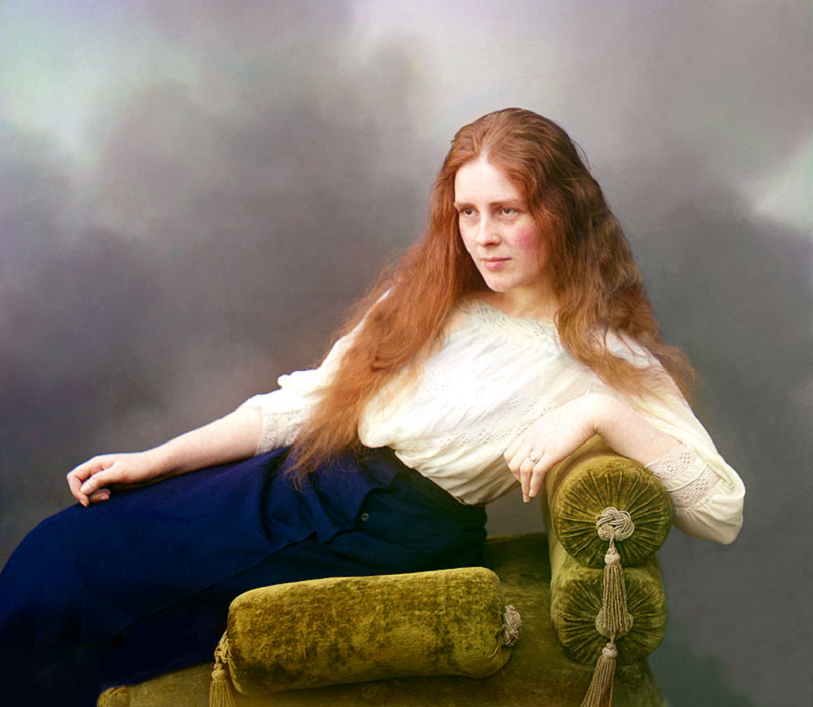

In [163]:
Image.open('model.ppm')

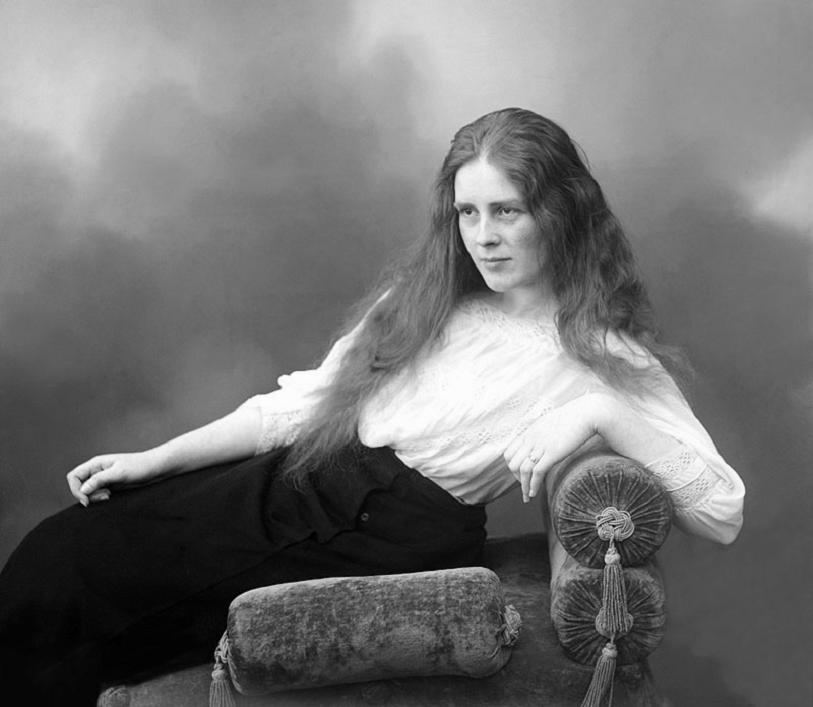

In [164]:
# ppm output of the image
Image.open('Grey_luminosity.ppm')   


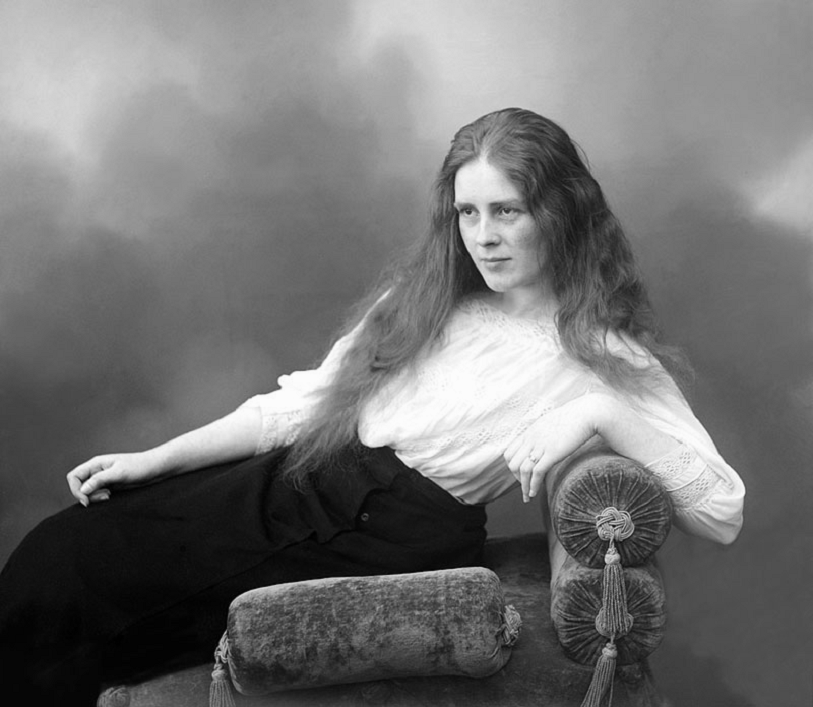

In [165]:
# pgm output of the image 
Image.open('Grey_luminosity.pgm')

In [166]:
#pgm image freed from the memory
new_obj.pgm_free()

In [167]:
#ppm image freed from the memory
new_obj.ppm_free()